# Урок 2
Дискретные случайные величины. Закон распределения вероятностей. Биномиальный закон распределения. Распределение Пуассона

Домашнее задание

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [1]:
def arrangements(n: int, k: int) -> int:
  """Число размещений."""
  return np.math.factorial(n) // np.math.factorial(n - k)

def permutations(n: int) -> int:
  """Число перестановок."""
  return np.math.factorial(n)

def combinations(n: int, k: int) -> int:
  """Число сочетаний."""
  return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

## Задача 1
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите `M(X)`, `D(X)`.

**Решение**

При простом угадывании вероятнось угадать каждый ответ = 1/4. Решение по биномиальному распределению

In [9]:
n = 5
p = 1/4

In [10]:
def proba(k: int) -> float:
    return combinations(n, k) * (p ** k) * ((1 - p) ** (n-k))

In [14]:
x_values = np.arange(0, n +1)
print(x_values)

[0 1 2 3 4 5]


In [13]:
x_probas = np.array([proba(value) for value in x_values])
print(x_probas)

[0.23730469 0.39550781 0.26367188 0.08789062 0.01464844 0.00097656]


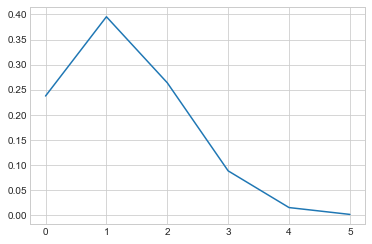

In [16]:
plt.plot(x_values, x_probas);

Вычислим M(X) и D(X)

In [18]:
print(f'M(X) = {n * p}')
print(f'D(X) = {n * p * (1 - p)}')

M(X) = 1.25
D(X) = 0.9375


## Задача 2
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

**Решение**

Задача решается через распределение Пуассона. 
- $\lambda$ = 10 писем в сутки
- 0.95 - это сумма вероятностей при k < N
$$P(X \leq N) = \displaystyle\sum_{i = 0}^{N} \dfrac{10^{i} e^{-10}}{i!} = 0.95$$

In [19]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [20]:
for n in range(-1, 18):

    print(f'n = {n}', 
        sum(poisson_proba(k=i, lambda_=10) for i in range(n))
    )

n = -1 0
n = 0 0
n = 1 4.5399929762484854e-05
n = 2 0.0004993992273873334
n = 3 0.0027693957155115762
n = 4 0.010336050675925718
n = 5 0.029252688076961072
n = 6 0.06708596287903178
n = 7 0.13014142088248296
n = 8 0.22022064660169893
n = 9 0.33281967875071894
n = 10 0.45792971447185227
n = 11 0.5830397501929856
n = 12 0.6967761463031068
n = 13 0.7915564763948745
n = 14 0.8644644226193111
n = 15 0.9165415270653373
n = 16 0.9512595966960214
n = 17 0.972958390215199


In [21]:
# Вариант из разбора ДЗ
i = -1
p = 0

while p < 0.95:
    i += 1
    p += poisson_proba(i, lambda_=10)

print(i, p)

15 0.9512595966960214


с вероятностью примерно 0.95 число писем должно быть до 16

## Задача 3
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

*Подсказка*. 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

Вероятность попадания в цель при одном выстреле равна p. Производится n
выстрелов. Найти вероятность того, что цель будет поражена в точности k раз (будет k попаданий).

In [2]:
otvet = combinations(x, 6) * (0.01**6) * (1 - 0.01)**(x - 6) 

NameError: name 'x' is not defined